In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy.spatial.distance import cosine

In [6]:
file_path=r"C:\Users\ygred\Documents\DOCUMENTS\ML LAB\Lab Session Data.xlsx"
xls=pd.ExcelFile(file_path)
print("sheets in excel:", xls.sheet_names)

sheets in excel: ['Purchase data', 'IRCTC Stock Price', 'thyroid0387_UCI', 'marketing_campaign']


In [23]:
#A1.PURCHASE DATA
import pandas as pd
import numpy as np

file_path = r"C:\Users\ygred\Documents\DOCUMENTS\ML LAB\Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="Purchase data")

A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
C = df[['Payment (Rs)']].values

A = np.nan_to_num(A, nan=0.0, posinf=0.0, neginf=0.0).astype(np.float64)
C = np.nan_to_num(C, nan=0.0, posinf=0.0, neginf=0.0).astype(np.float64)

rank = np.linalg.matrix_rank(A)
X = np.linalg.pinv(A) @ C

print("🔹 A1: MATRIX ANALYSIS")
print("Dimensionality of vector space:", A.shape[1])
print("Number of vectors:", A.shape[0])
print("Rank of matrix A:", rank)
print("Estimated product costs (X):", X.flatten())

🔹 A1: MATRIX ANALYSIS
Dimensionality of vector space: 3
Number of vectors: 10
Rank of matrix A: 3
Estimated product costs (X): [ 1. 55. 18.]


In [25]:
#A2.RICH OR POOR
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

file_path = r"C:\Users\ygred\Documents\DOCUMENTS\ML LAB\Lab Session Data.xlsx"
df = pd.read_excel(file_path, sheet_name="Purchase data")

# Features and Target
X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
df['Class'] = df['Payment (Rs)'].apply(lambda x: 1 if x > 200 else 0)
y = df['Class']

# If dataset too small, train on full data
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)

print("🔹 A2: CLASSIFICATION - RICH (1) / POOR (0)")
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, zero_division=0))


🔹 A2: CLASSIFICATION - RICH (1) / POOR (0)
Confusion Matrix:
 [[4 0]
 [0 6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



🔹 A3.1: MEAN AND VARIANCE
Mean price: 1560.663453815261
Variance in price: 58732.365352539186

🔹 A3.2: MEAN ON WEDNESDAYS
Mean price on Wednesdays: 1550.706

🔹 A3.3: MEAN IN APRIL
Mean price in April: 1698.9526315789474

🔹 A3.4: PROBABILITY OF LOSS
P(loss): 0.4979919678714859

🔹 A3.5: PROFIT ON WEDNESDAY
P(profit | Wednesday): 0.42

🔹 A3.6: CONDITIONAL PROBABILITY
P(profit | Wednesday): 0.42


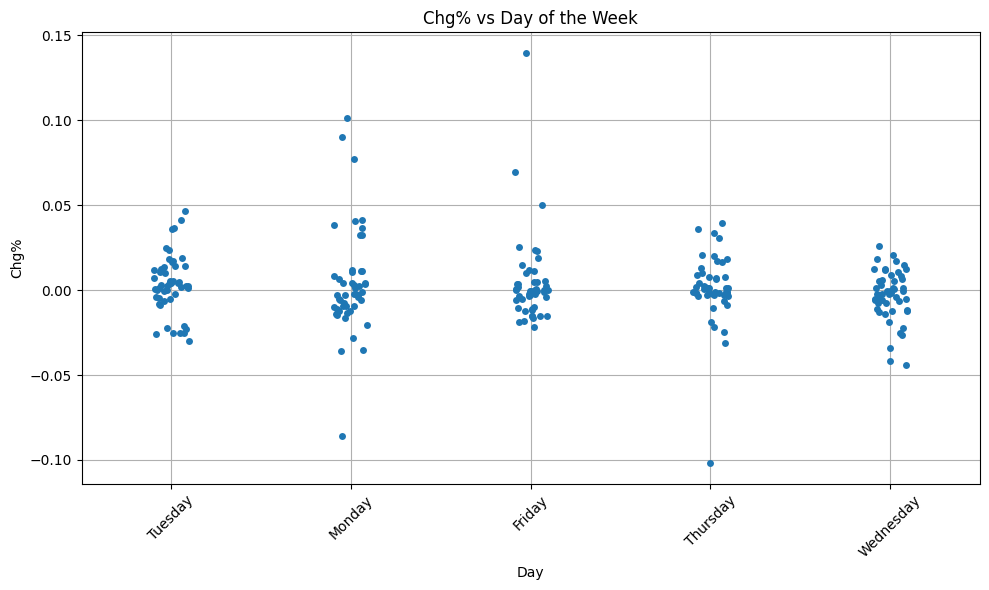

In [26]:
#A3.IRCTC STOCK PRICE
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel and IRCTC sheet
file_path = r"C:\Users\ygred\Documents\DOCUMENTS\ML LAB\Lab Session Data.xlsx"
stock_df = pd.read_excel(file_path, sheet_name="IRCTC Stock Price")

# Convert Date column
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Day'] = stock_df['Date'].dt.day_name()

# Access price and change columns
price_col = stock_df.columns[3]   # Assuming 4th column is price
chg_col = stock_df.columns[8]     # Assuming 9th column is Chg%

# A3.1 – Mean and variance of price
price = stock_df[price_col].dropna()
print("🔹 A3.1: MEAN AND VARIANCE")
print("Mean price:", statistics.mean(price))
print("Variance in price:", statistics.variance(price))

# A3.2 – Mean on Wednesdays
wed_price = stock_df[stock_df['Day'] == 'Wednesday'][price_col]
print("\n🔹 A3.2: MEAN ON WEDNESDAYS")
print("Mean price on Wednesdays:", statistics.mean(wed_price))

# A3.3 – Mean in April
april_price = stock_df[stock_df['Date'].dt.month == 4][price_col]
print("\n🔹 A3.3: MEAN IN APRIL")
print("Mean price in April:", statistics.mean(april_price))

# A3.4 – Probability of making a loss (chg% < 0)
chg = stock_df[chg_col].dropna()
prob_loss = (chg < 0).sum() / len(chg)
print("\n🔹 A3.4: PROBABILITY OF LOSS")
print("P(loss):", prob_loss)

# A3.5 – Probability of profit on Wednesday (chg% > 0 on Wed)
wed_chg = stock_df[stock_df['Day'] == 'Wednesday'][chg_col].dropna()
prob_profit_wed = (wed_chg > 0).sum() / len(wed_chg)
print("\n🔹 A3.5: PROFIT ON WEDNESDAY")
print("P(profit | Wednesday):", prob_profit_wed)

# A3.6 – Conditional probability P(profit | Wednesday)
prob_wed = len(wed_chg) / len(chg)
prob_profit_and_wed = (wed_chg > 0).sum() / len(chg)
cond_prob = prob_profit_and_wed / prob_wed
print("\n🔹 A3.6: CONDITIONAL PROBABILITY")
print("P(profit | Wednesday):", cond_prob)

# A3.7 – Scatter plot of Chg% vs Day
plt.figure(figsize=(10, 6))
sns.stripplot(x=stock_df['Day'], y=chg)
plt.title("Chg% vs Day of the Week")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
#A4.THYROID 
import pandas as pd
import numpy as np

# Load the thyroid dataset
file_path = r"C:\Users\ygred\Documents\DOCUMENTS\ML LAB\Lab Session Data.xlsx"
thyroid_df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# A4.1 – Missing values in each column
print("🔹 A4.1: MISSING VALUES")
print(thyroid_df.isnull().sum())

# A4.2 – Mean of all numeric attributes
print("\n🔹 A4.2: MEAN OF NUMERIC COLUMNS")
print(thyroid_df.select_dtypes(include=[np.number]).mean())

# A4.3 – Variance of all numeric attributes
print("\n🔹 A4.3: VARIANCE OF NUMERIC COLUMNS")
print(thyroid_df.select_dtypes(include=[np.number]).var())

🔹 A4.1: MISSING VALUES
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype: int64

🔹 

In [33]:
#A5.JACCARD COEFF
import numpy as np

# Manually created binary vectors
v1 = np.array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
v2 = np.array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

# Count matching/non-matching bits
f11 = int(((v1 == 1) & (v2 == 1)).sum())
f10 = int(((v1 == 1) & (v2 == 0)).sum())
f01 = int(((v1 == 0) & (v2 == 1)).sum())
f00 = int(((v1 == 0) & (v2 == 0)).sum())

# Similarity scores
jc = f11 / (f11 + f10 + f01 + 1e-10)
smc = (f11 + f00) / (f11 + f10 + f01 + f00 + 1e-10)

# Output
print("🔹 A5: SIMILARITY METRICS BETWEEN VECTOR 1 AND VECTOR 2 (binary only):")
print(f"f11: {f11}")
print(f"f10: {f10}")
print(f"f01: {f01}")
print(f"f00: {f00}")
print(f"Jaccard Coefficient: {jc:.3f}")
print(f"Simple Matching Coefficient: {smc:.3f}")

🔹 A5: SIMILARITY METRICS BETWEEN VECTOR 1 AND VECTOR 2 (binary only):
f11: 2
f10: 1
f01: 2
f00: 5
Jaccard Coefficient: 0.400
Simple Matching Coefficient: 0.700


In [34]:
#A6.COSINE SIMILARITY
import numpy as np
from scipy.spatial.distance import cosine

# You can reuse the same two vectors from A5
v1 = np.array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
v2 = np.array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

# Compute cosine similarity
cos_sim = 1 - cosine(v1, v2)

# Output
print("🔹 A6: COSINE SIMILARITY")
print(f"Cosine Similarity between v1 and v2: {cos_sim:.3f}")

🔹 A6: COSINE SIMILARITY
Cosine Similarity between v1 and v2: 0.577


C:\Users\ygred\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\spatial\distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)
C:\Users\ygred\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\ygred\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


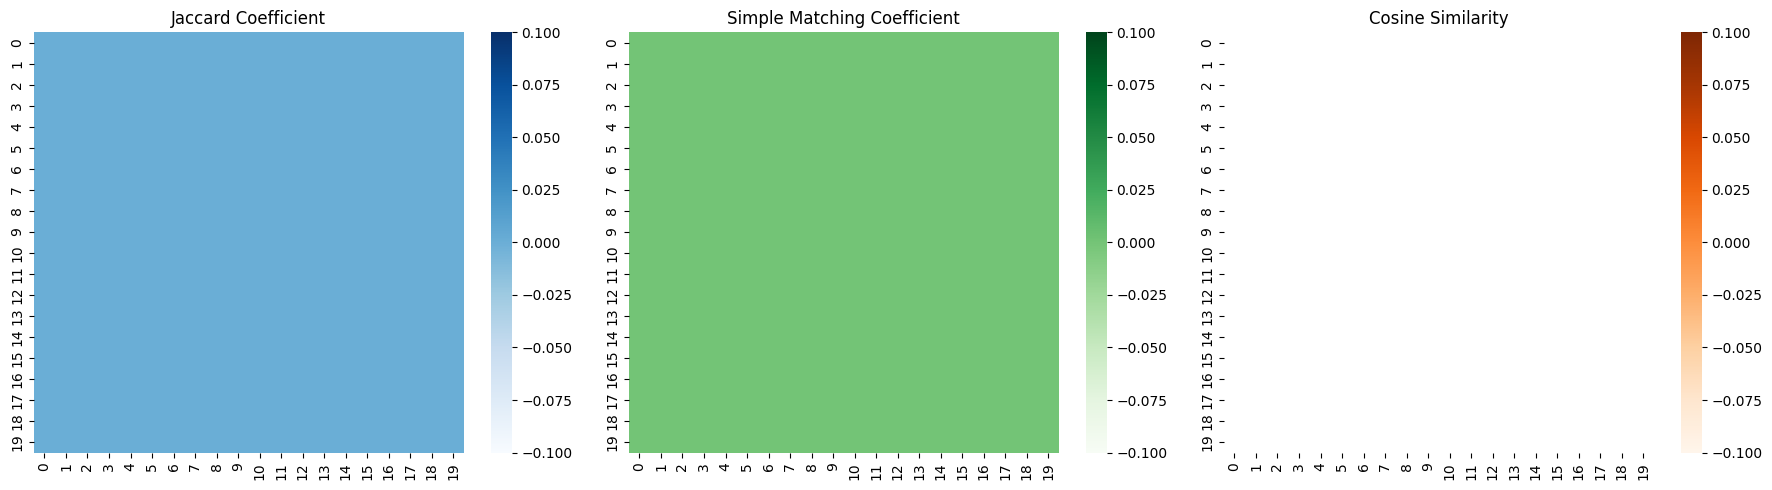

In [35]:
#A7.SIMILARITY HEATMAPS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

# Load thyroid data
file_path = r"C:\Users\ygred\Documents\DOCUMENTS\ML LAB\Lab Session Data.xlsx"
thyroid_df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Keep only numeric binary columns
bin_df = thyroid_df.select_dtypes(include=[np.number]).dropna(axis=1)
binary_only = bin_df.loc[:, ((bin_df == 0) | (bin_df == 1)).all()]

# Select first 20 binary vectors (rows)
sample = binary_only.iloc[:20]

n = len(sample)
jc_mat = np.zeros((n, n))
smc_mat = np.zeros((n, n))
cos_mat = np.zeros((n, n))

# Compute all pairwise similarity metrics
for i in range(n):
    for j in range(n):
        a = sample.iloc[i]
        b = sample.iloc[j]
        f11 = int(((a == 1) & (b == 1)).sum())
        f10 = int(((a == 1) & (b == 0)).sum())
        f01 = int(((a == 0) & (b == 1)).sum())
        f00 = int(((a == 0) & (b == 0)).sum())
        
        jc_mat[i][j] = f11 / (f11 + f10 + f01 + 1e-10)
        smc_mat[i][j] = (f11 + f00) / (f11 + f10 + f01 + f00 + 1e-10)
        cos_mat[i][j] = 1 - cosine(a, b)

# Plot heatmaps
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_mat, annot=False, cmap="Blues")
plt.title("Jaccard Coefficient")

plt.subplot(1, 3, 2)
sns.heatmap(smc_mat, annot=False, cmap="Greens")
plt.title("Simple Matching Coefficient")

plt.subplot(1, 3, 3)
sns.heatmap(cos_mat, annot=False, cmap="Oranges")
plt.title("Cosine Similarity")

plt.tight_layout()
plt.show()

In [36]:
#A8.IMPUTATION
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load data
file_path = r"C:\Users\ygred\Documents\DOCUMENTS\ML LAB\Lab Session Data.xlsx"
thyroid_df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Separate numeric and categorical columns
num_cols = thyroid_df.select_dtypes(include=[np.number]).columns
cat_cols = thyroid_df.select_dtypes(exclude=[np.number]).columns

# Impute numeric columns with mean
mean_imputer = SimpleImputer(strategy='mean')
thyroid_df[num_cols] = mean_imputer.fit_transform(thyroid_df[num_cols])

# Impute categorical columns with mode
mode_imputer = SimpleImputer(strategy='most_frequent')
thyroid_df[cat_cols] = mode_imputer.fit_transform(thyroid_df[cat_cols])

# Output to confirm
print("🔹 A8: DATA IMPUTATION COMPLETE")
print("All missing values filled using mean (numeric) and mode (categorical).")

🔹 A8: DATA IMPUTATION COMPLETE
All missing values filled using mean (numeric) and mode (categorical).


In [37]:
#A9.MIN MAN NORMALIZATION
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data again (already imputed in A8)
file_path = r"C:\Users\ygred\Documents\DOCUMENTS\ML LAB\Lab Session Data.xlsx"
thyroid_df = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Select numeric columns
num_cols = thyroid_df.select_dtypes(include=[np.number]).columns

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
thyroid_df[num_cols] = scaler.fit_transform(thyroid_df[num_cols])

# Output preview
print("🔹 A9: DATA NORMALIZATION COMPLETE")
print("Preview of normalized data:")
print(thyroid_df[num_cols].head())

🔹 A9: DATA NORMALIZATION COMPLETE
Preview of normalized data:
      Record ID       age
0  0.000000e+00  0.000427
1  3.410871e-08  0.000427
2  9.891527e-07  0.000610
3  6.934301e-05  0.000534
4  6.937712e-05  0.000473
